<a href="https://colab.research.google.com/github/marcomedugno/marcomedugno/blob/main/TF_Modeling%2C_Scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert Fahrenheit (F) to Celsius (C)
C = 5/9 * (F-32) ~ 0.555556 F - 17.777778

### **Marco Medugno**

In [ ]:
TRUE_WEIGHT = 5.0 / 9.0 # slope
TRUE_BIAS = -160.0 / 9.0 # intercept

In [ ]:
import tensorflow as tf
import seaborn as sn

In [ ]:
# displays output inline
%matplotlib inline

# Data Preprocessing

In [ ]:
samples = 1000 # number of samples
input = tf.constant(tf.random.normal(shape=(samples,)),name='input') # input feature as constant to the model
noise = tf.random.normal(shape=(samples,))
output = tf.constant(input * TRUE_WEIGHT + TRUE_BIAS + noise,name='output') # input target as constant to the model

In [ ]:
epochs = 25 # number of iterations; can be increased
learning_rate = 0.1 # a higher value will create “exploding gradient issue” whereas a small value will lead to long training time

# TF Modeling - Linear Regression

In [ ]:
# define model
class Model:
    def __init__(self):
        self.weight = tf.Variable(-10.0)
        self.bias = tf.Variable(10.0)

    def __call__(self, input):
        return self.weight * input + self.bias

In [ ]:
# use mean squared error as loss function
def loss(output, output_pred):
    return tf.reduce_mean(tf.square(output - output_pred))

In [ ]:
# compute the gradient of the model parameters with respect to the loss
def train(model, input, output, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(output, model(input))

    d_weight, d_bias = tape.gradient(current_loss, [model.weight, model.bias])
    model.weight.assign_sub(learning_rate * d_weight)
    model.bias.assign_sub(learning_rate * d_bias)

In [ ]:
# training loop that updates weights and biases
model = Model()
weights, biases = [], []
for epoch in range(epochs):
    # eager execution
    weights.append(model.weight.numpy())
    biases.append(model.bias.numpy())

    current_loss = loss(output, model(input))

    train(model, input, output, learning_rate)
    if epoch % 1 == 0:
        print("Epoch #%d Loss = %f" % (epoch, current_loss.numpy()))

Epoch #0 Loss = 875.116821
Epoch #1 Loss = 563.286987
Epoch #2 Loss = 362.712067
Epoch #3 Loss = 233.693344
Epoch #4 Loss = 150.699615
Epoch #5 Loss = 97.310234
Epoch #6 Loss = 62.963902
Epoch #7 Loss = 40.867455
Epoch #8 Loss = 26.651344
Epoch #9 Loss = 17.504837
Epoch #10 Loss = 11.619856
Epoch #11 Loss = 7.833237
Epoch #12 Loss = 5.396704
Epoch #13 Loss = 3.828835
Epoch #14 Loss = 2.819902
Epoch #15 Loss = 2.170625
Epoch #16 Loss = 1.752784
Epoch #17 Loss = 1.483871
Epoch #18 Loss = 1.310801
Epoch #19 Loss = 1.199410
Epoch #20 Loss = 1.127715
Epoch #21 Loss = 1.081567
Epoch #22 Loss = 1.051863
Epoch #23 Loss = 1.032742
Epoch #24 Loss = 1.020433


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 0, 'Iteration (epoch)')

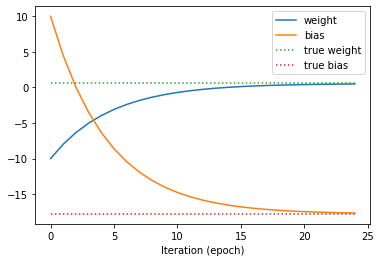

In [ ]:
sn.lineplot(range(epochs), weights, label="weight")
sn.lineplot(range(epochs), biases, label="bias")
sn.lineplot(range(epochs), [TRUE_WEIGHT] * epochs, linestyle="dotted", label="true weight")
pt = sn.lineplot(range(epochs), [TRUE_BIAS] * epochs, linestyle="dotted", label="true bias")
pt.set_xlabel("Iteration (epoch)")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Celsius (C)'), Text(0.5, 0, 'Fahrenheit (F)')]

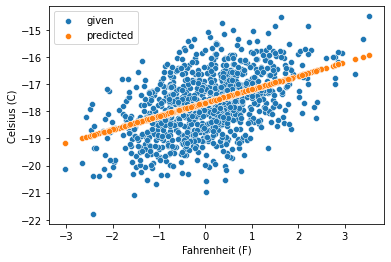

In [ ]:
sn.scatterplot(input, output, label="given")
pt = sn.scatterplot(input, model(input), label="predicted")
pt.set(xlabel="Fahrenheit (F)", ylabel="Celsius (C)")